### **Importing Libraries**

In [9]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

### **Loading the Data**

In [10]:
mnist = tf.keras.datasets.mnist

### **Splitting the data into train test and split**

In [11]:
#f = features
#l = labels

(f_train,l_train), (f_test, l_test) = mnist.load_data()

##### **Viewing the data**

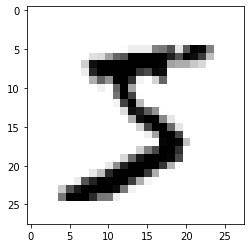

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [21]:
plt.imshow(f_train[0], cmap= plt.cm.binary)
plt.show()
print(f_train[0])

##### **Normalizing the dataset**

Hence the data's are valued between 0 to 255, We need to normalize the values to 0 to 1, Normalizing the data generally speeds up learning and leads to faster convergence and to bring the numerical data to a common scale without distorting its shape.

In [23]:
f_train = tf.keras.utils.normalize(f_train, axis = 1)
f_test = tf.keras.utils.normalize(f_test, axis = 1)
print(f_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### **Creating a Deep Neural Network**

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(f_train, l_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2707 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1114 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0556 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9866


In [27]:
val_loss, val_accuracy = model.evaluate(f_test,l_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9735
0.0907168835401535 0.9735000133514404


In [29]:
model.save("img_to_numb.model")

mnist_model = tf.keras.models.load_model("img_to_numb.model")

INFO:tensorflow:Assets written to: img_to_numb.model/assets


In [39]:
pred = mnist_model.predict(f_test)
print(np.argmax(pred[123]))

6


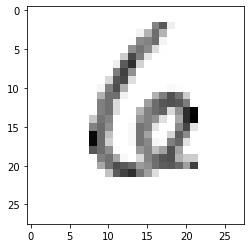

In [38]:
plt.imshow(f_test[123], cmap = plt.cm.binary)
plt.show()